In [1]:
import random
random.seed(123)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipynb.fs.full.Part_1A import calculate_distances

In [2]:
def read_data():
    data_KMC = np.genfromtxt("clustering/data.csv", delimiter=',')
    return data_KMC

In [3]:
def generate_centroids(featureData, k):
    '''
        A function called generate_centroids that will take in as arguments the feature data and 
        the number of centroids (an integer which we will call k).
        The function will randomly select k feature instances (k rows of the dataset) and return these as the initial centroids
        (the k centroids should be returned as a single array). 
    '''
    ind = random.sample(range(len(featureData)), k=k)
    centroids = featureData[ind]
    return centroids

In [4]:
def assign_centroids(featureData, centroids):
    '''
        A function called assign_centroids, which will take in as arguments the feature data and 
        the current array of centroids. This function should calculate the distance between each 
        centroid and all feature data instances (each of the rows in the dataset). It should return 
        the centroid index that is closest to each individual feature instance.    
    '''
    indicesCentroids = []
    for d in featureData:
        indicesCentroids.append(np.argmin(calculate_distances(centroids, d)))
    return np.array(indicesCentroids)

In [5]:
def move_centroids(featureData, indicesCentroids, centroids):
    '''
        A function called move_centroids, which will take in as arguments the feature data, an 
        array containing the centroid indices assigned to each feature instance (this is the output 
        of assign_centroids) and the current set of centroids. This function will compute the new 
        position of the centroids (by calculating the mean of the datapoints assigned to each 
        specific centroid) and will return an array containing the new centroids.
    '''
#     lenCentroids = len(centroids)
    newCentroids = [featureData[indicesCentroids == c].mean(axis=0) for c in range(len(centroids))]
    return np.array(newCentroids)

In [6]:
def calculate_cost(featureData, indicesCentroids, centroids):
    '''
        A function called calculate_cost which will take in as arguments the feature data, an 
        array containing the centroid indices assigned to each feature instance (this is the output 
        of assign_centroids) and the current array of centroids. It should calculate and return the 
        current distortion cost function. The distortion cost function can be calculated below. 
    '''
    cost = np.mean(np.sum(np.square(centroids[indicesCentroids] - featureData), axis=1))
    return cost

In [7]:
def restart_KMeans(featureData, numberCentroids=3, numberIterations=10, numberRestart=10):
    '''
        A function called restart_KMeans, which will take in as arguments the feature data, the 
        number of centroids (an integer), the number of iterations (an integer) and the number of 
        restarts (an integer).
    '''
    bestCost = float('inf')
    # float('inf')It acts as an unbounded upper value for comparison. This is useful for finding lowest values for something.
    
    for ind in range(numberRestart):
        centroids = generate_centroids(featureData, numberCentroids) # returns with centroids of single array
#         print(centroids)
        for i in range(numberIterations):
            indicesCentroids = assign_centroids(featureData, centroids)
#             print(indicesCentroids)
            centroids = move_centroids(featureData, indicesCentroids, centroids)
#             print(centroids)
        
        cost_ = calculate_cost(featureData, indicesCentroids, centroids)
#         print(cost_)
        
        if cost_ < bestCost:
            bestCost =cost_
            bestCentroids = centroids.copy()
    
    return bestCost, bestCentroids


In [8]:
# data_KMC = read_data()
# restart_KMeans(data_KMC)

In [9]:
def visualisation_elbow_plot(clusters, cost):
    plt.plot(clusters, cost)
    plt.title(" Cost vs Number of centroids ")
    plt.xlabel("Number of Centroids")
    plt.ylabel("Cost - Distortion function")
    plt.grid(True)

In [149]:
 def _main_():
    data_KMC = read_data()
    # print(data_KMC)
    numberCluster = [1,2,3,4,5,6,7,8,9,10]
    cost_ = []
    numberIterations, numberRestart = 10, 10
    for c in range(1, 11, 1):
        cost, centroids = restart_KMeans(data_KMC, c, numberIterations, numberRestart)
        cost_.append(cost)
        print("Centroids K = ", c, "Cost = ", cost)
    visualisation_elbow_plot(numberCluster, cost_)

Centroids K =  1 Cost =  128.18845806187915
Centroids K =  2 Cost =  40.008753227335646
Centroids K =  3 Cost =  18.07608582263684
Centroids K =  4 Cost =  2.922150566084583
Centroids K =  5 Cost =  2.8365713593621606
Centroids K =  6 Cost =  2.7626720616812985
Centroids K =  7 Cost =  2.6759588842903717
Centroids K =  8 Cost =  2.6193057633926276
Centroids K =  9 Cost =  2.5419683382872686


<ipython-input-130-00b8bbc489b6>:10: RuntimeWarning: Mean of empty slice.
  newCentroids = [featureData[indicesCentroids == c].mean(axis=0) for c in range(len(centroids))]


Centroids K =  10 Cost =  2.4857708181864098


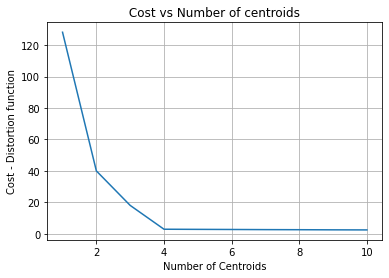

In [150]:
_main_()

# Let us normalise the data to reduce the distortion cost

In [12]:
 def Normalised_Main_():
    data_KMC = read_data()
    # print(data_KMC)
    normalisedData = (data_KMC - data_KMC.min(axis=0)) / (data_KMC.max(axis=0) - data_KMC.min(axis=0))
    
    numberCluster = [1,2,3,4,5,6,7,8,9,10]
    cost_ = []
    numberIterations, numberRestart = 10, 10
    for c in range(1, 11, 1):
        cost, centroids = restart_KMeans(normalisedData, c, numberIterations, numberRestart)
        cost_.append(cost)
        print("Centroids K = ", c, "Cost = ", cost)
    visualisation_elbow_plot(numberCluster, cost_)

Centroids K =  1 Cost =  0.3888573475586305
Centroids K =  2 Cost =  0.17339376706981183
Centroids K =  3 Cost =  0.07959917043818183
Centroids K =  4 Cost =  0.01734776072961027
Centroids K =  5 Cost =  0.0163437757332001
Centroids K =  6 Cost =  0.015364233688303076
Centroids K =  7 Cost =  0.014439406342684091
Centroids K =  8 Cost =  0.013933274736416737
Centroids K =  9 Cost =  0.012944942505426769
Centroids K =  10 Cost =  0.0125645390536903


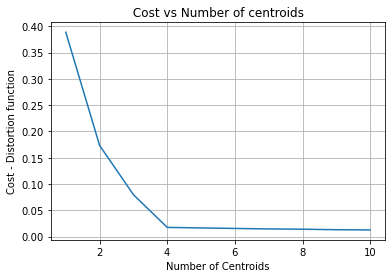

In [13]:
Normalised_Main_()

# Normalising the data has improved the Cost